<a href="https://colab.research.google.com/github/hemanthkumar17/Probabilistic-Algorithms-Implementations/blob/main/Avalanche_Test_for_Hash_Functions_and_Turtle_confidence_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.utils import murmurhash3_32
import seaborn as sns

In [ ]:
P = 1048573
seed = 4
n_samples = 5000
n_bits = 10
np.random.seed(seed)
def get_abcd():
    return np.random.randint(P), np.random.randint(P), np.random.randint(P), np.random.randint(P)

In [ ]:
a, b, c, d = get_abcd()
hash1 = lambda x: ((a * x + b) % P) % 2**n_bits
hash2 = lambda x: ((a * x**2 + b * x + c) % P) % 2**n_bits
hash3 = lambda x: ((a * x**3 + b * x**2 + c * x + d) % P) % 2**n_bits
hash4 = lambda x: murmurhash3_32(x, seed = seed) % (2 ** n_bits)

In [ ]:
print(a, b, c, d)

1000570 991406 485815 377541


In [ ]:
def get_heatmap(hash1):
    x = np.random.randint(0, 2**n_bits, n_samples).astype(np.int32)
    y = np.random.randint(0, n_bits, n_samples).astype(np.int32)
    y1 = hash1(x)
    y2 = hash1(x ^ (1 << y))
    get_binary = lambda q: np.array([list(map(int, np.binary_repr(p, width=n_bits))) for p in q])
    P1 = np.logical_and(get_binary(y1), np.logical_not(get_binary(y2)))
    print(P1)
    print(P1.shape)
    # P1 = np.logical_xor(get_binary(y1), get_binary(y2))
    print(P1.shape)
    print(P1)
    print(P1[0])
    print(np.binary_repr(y1[0], width=n_bits))
    print(np.binary_repr(y2[0], width=n_bits))
    heatmap = [np.mean(np.array([[P1[i] for i in range(len(y)) if y[i] == j] for j in range(n_bits)][k]), axis=0) for k in range(n_bits)]
    print(heatmap)
    sns.heatmap(heatmap, fmt='.2f', cmap="Greys", vmax=0.25)

[[False False False ...  True False  True]
 [ True  True  True ...  True  True False]
 [False False False ... False False False]
 ...
 [ True False False ... False False False]
 [False False False ...  True False False]
 [False False False ... False False False]]
(5000, 10)
(5000, 10)
[[False False False ...  True False  True]
 [ True  True  True ...  True  True False]
 [False False False ... False False False]
 ...
 [ True False False ... False False False]
 [False False False ...  True False False]
 [False False False ... False False False]]
[False False False False  True False False  True False  True]
1101110101
1101011010
[array([0.118, 0.238, 0.506, 0.042, 0.064, 0.098, 0.21 , 0.362, 0.274,
       0.466]), array([0.23347107, 0.51446281, 0.03305785, 0.04958678, 0.10743802,
       0.18181818, 0.40495868, 0.26033058, 0.5268595 , 0.0392562 ]), array([0.44144144, 0.01576577, 0.04504505, 0.09684685, 0.20495495,
       0.39414414, 0.20945946, 0.41216216, 0.03828829, 0.10135135]), array([

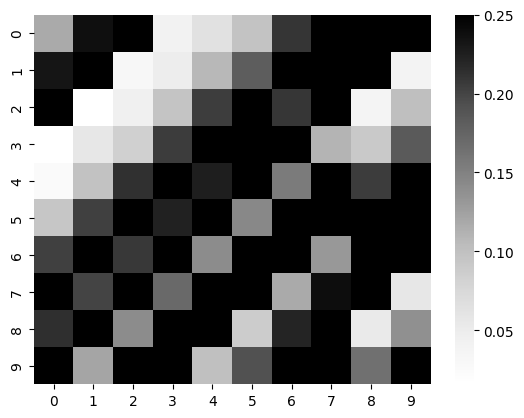

In [ ]:
get_heatmap(hash1)

[[False  True  True ...  True False False]
 [False False False ...  True False False]
 [False  True  True ... False False False]
 ...
 [False False  True ... False False  True]
 [False  True  True ...  True False False]
 [False False  True ... False False False]]
(5000, 10)
(5000, 10)
[[False  True  True ...  True False False]
 [False False False ...  True False False]
 [False  True  True ... False False False]
 ...
 [False False  True ... False False  True]
 [False  True  True ...  True False False]
 [False False  True ... False False False]]
[False  True  True  True False  True False  True False False]
0111110100
0000100010
[array([0.25787402, 0.2480315 , 0.23425197, 0.22637795, 0.2480315 ,
       0.21259843, 0.25393701, 0.25393701, 0.22637795, 0.22440945]), array([0.2289916 , 0.24369748, 0.26890756, 0.27310924, 0.27521008,
       0.27731092, 0.23529412, 0.25420168, 0.2710084 , 0.26680672]), array([0.23809524, 0.26190476, 0.24007937, 0.23015873, 0.27579365,
       0.25396825, 0.23015

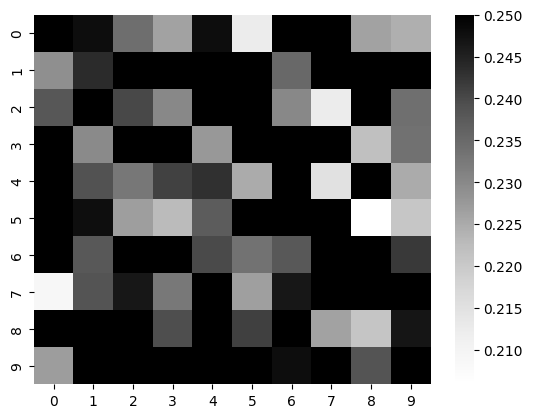

In [ ]:
get_heatmap(hash2)

[[ True  True False ...  True False False]
 [False  True  True ... False False False]
 [False False False ... False False  True]
 ...
 [ True  True False ... False  True False]
 [False False False ...  True False  True]
 [ True False  True ...  True False False]]
(5000, 10)
(5000, 10)
[[ True  True False ...  True False False]
 [False  True  True ... False False False]
 [False False False ... False False  True]
 ...
 [ True  True False ... False  True False]
 [False False False ...  True False  True]
 [ True False  True ...  True False False]]
[ True  True False False  True False False  True False False]
1100101101
0011001011
[array([0.2647585 , 0.26654741, 0.23613596, 0.27549195, 0.2254025 ,
       0.25402504, 0.22719141, 0.2254025 , 0.31305903, 0.27012522]), array([0.27079304, 0.23597679, 0.25531915, 0.28626692, 0.23017408,
       0.24758221, 0.24951644, 0.23597679, 0.2901354 , 0.24758221]), array([0.27504912, 0.26719057, 0.21021611, 0.23182711, 0.27111984,
       0.22986248, 0.24361

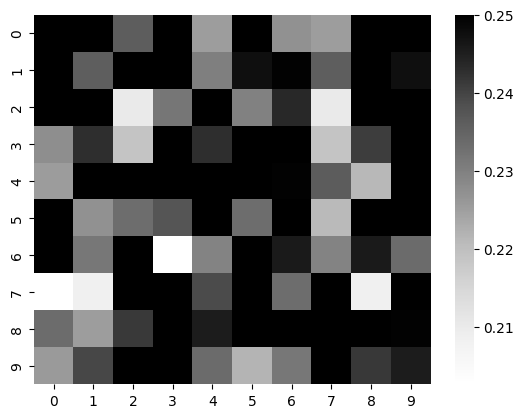

In [ ]:
get_heatmap(hash3)

[[False False  True ...  True  True False]
 [False  True  True ... False False  True]
 [False False False ... False False False]
 ...
 [False False  True ...  True False False]
 [False False False ... False  True False]
 [False False False ... False False False]]
(5000, 10)
(5000, 10)
[[False False  True ...  True  True False]
 [False  True  True ... False False  True]
 [False False False ... False False False]
 ...
 [False False  True ...  True False False]
 [False False False ... False  True False]
 [False False False ... False False False]]
[False False  True False  True False False  True  True False]
0011101110
0001011001
[array([0.23943662, 0.24748491, 0.29979879, 0.2334004 , 0.24949698,
       0.2334004 , 0.22937626, 0.26961771, 0.24949698, 0.25955734]), array([0.2358871 , 0.26209677, 0.22177419, 0.2016129 , 0.29233871,
       0.26612903, 0.28225806, 0.23991935, 0.24193548, 0.21975806]), array([0.20675944, 0.26441352, 0.2584493 , 0.25646123, 0.23658052,
       0.23658052, 0.29224

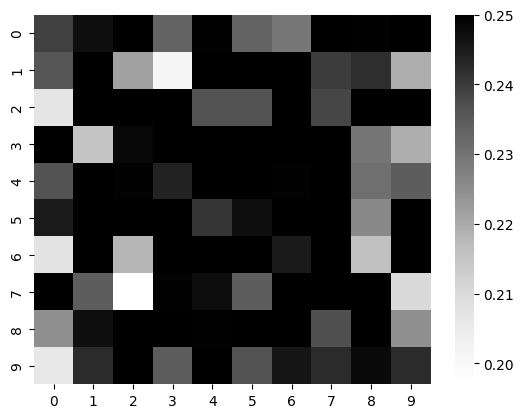

In [ ]:
get_heatmap(hash4)

## Q2 Counting Turtle Confidence

By Chebyshev inequality, $Pr(|X - \mu | \geq \frac{\sigma}{\sqrt \delta}) \leq \delta$, showing that a = $\frac{\sigma}{\sqrt \delta}$ provides a error of $\delta$. <br><br>
When $\delta=0.05$, a $\approx 0.47 \sigma$ meaning that for a repetition of 5 times, the standard deviation leans towards the normal distribution, thus providing the confidence of 0.05, from central limit theorem. <br><br>
$Pr( \frac{k_1k_2}{\frac{\sigma}{\delta}-E(M)} \leq \hat{n} \leq \frac{k_1k_2}{\frac{\sigma}{\delta}+E(M)}) \leq \delta$
<br><br>
It becomes very hard to estimate when $E(M) >> \frac{\sigma}{\delta}$ since the error factor almost diminishes in the confidence intervals.